In [49]:
# importations of the libraries

import pandas as pd # dataframes
import numpy as np   # arrays and math operations
from sklearn.model_selection import train_test_split   # for splitting datasets into training and testing sets
import matplotlib.pyplot as plt  # plotting
from scipy.spatial.distance import minkowski # distance calculation of minkowski

# k-nearest neighbours algorithm for classification
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score






In [50]:
# reading the csv file of the data
df = pd.read_csv('imputed_data.csv')
X = df.drop(columns=['koi_disposition'])  
y = df['koi_disposition']  


In [51]:

X_no_missing = X.dropna()
y_no_missing = y[X.index.isin(X_no_missing.index)]

class1_data = X_no_missing[y_no_missing == 'CONFIRMED'].iloc[:, 1:]  # Exclude the first column
class2_data = X_no_missing[y_no_missing == 'CANDIDATE'].iloc[:, 1:]  # Exclude the first column

class1_mean = np.mean(class1_data, axis=0)
class2_mean = np.mean(class2_data, axis=0)

class1_std = np.std(class1_data, axis=0)
class2_std = np.std(class2_data, axis=0)

distance_between_classes = np.linalg.norm(class1_mean - class2_mean)


print("Distance between mean vectors of two classes:", distance_between_classes)


Distance between mean vectors of two classes: 152064.14105842987


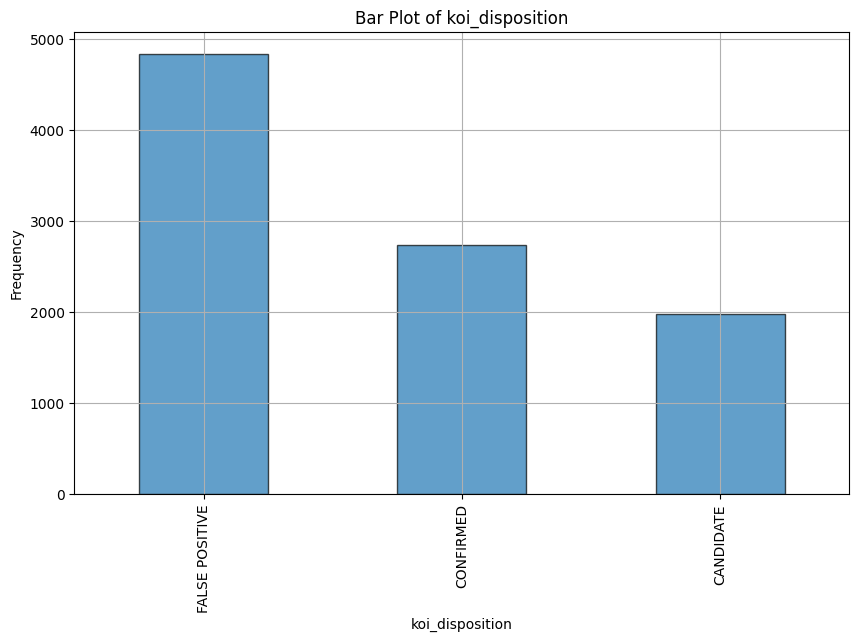

In [52]:

selected_feature = 'koi_disposition'  

feature_data = df[selected_feature]

category_counts = feature_data.value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title(f'Bar Plot of {selected_feature}')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


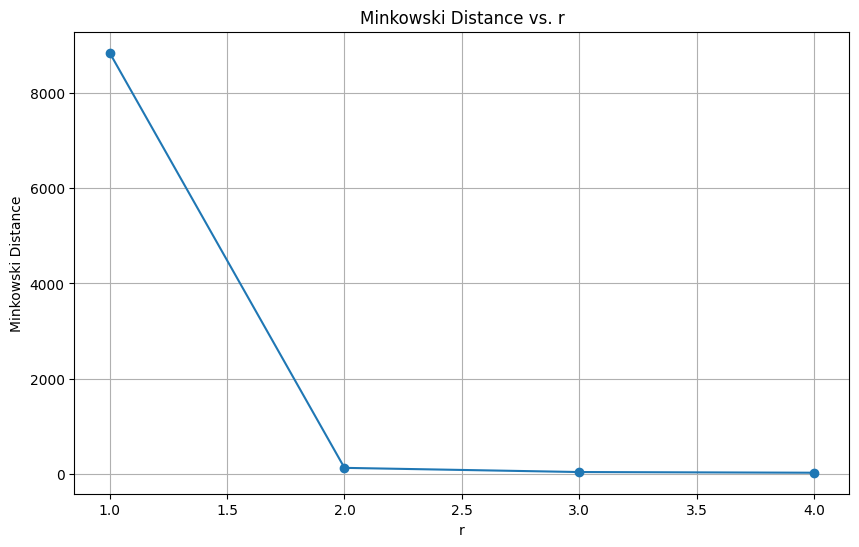

In [53]:
feature_vector1 = df['koi_score']  
feature_vector2 = df['koi_count']  

distances = []
r_values = list(range(1, 5))  

# Minkowski distance for each value of r
for r in r_values:
    distance = minkowski(feature_vector1, feature_vector2, p=r)
    distances.append(distance)

# Plot the distances as a function of r
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

In [54]:
class_labels = ['CONFIRMED', 'FALSE POSITIVE']
df_two_classes = df[df['koi_disposition'].isin(class_labels)]

# Split the dataset into features (X) and target variable (y)
X = df_two_classes.drop(columns=['koi_disposition'])
y = df_two_classes['koi_disposition']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [55]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train, y_train)

# accuracy of the kNN classifier
accuracy = knn_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# make predictions for test vectors
predictions = knn_classifier.predict(X_test)
print("Predictions for test vectors:", predictions)

Accuracy: 0.5898954703832753
Predictions for test vectors: ['FALSE POSITIVE' 'CANDIDATE' 'CONFIRMED' ... 'FALSE POSITIVE' 'CONFIRMED'
 'CONFIRMED']


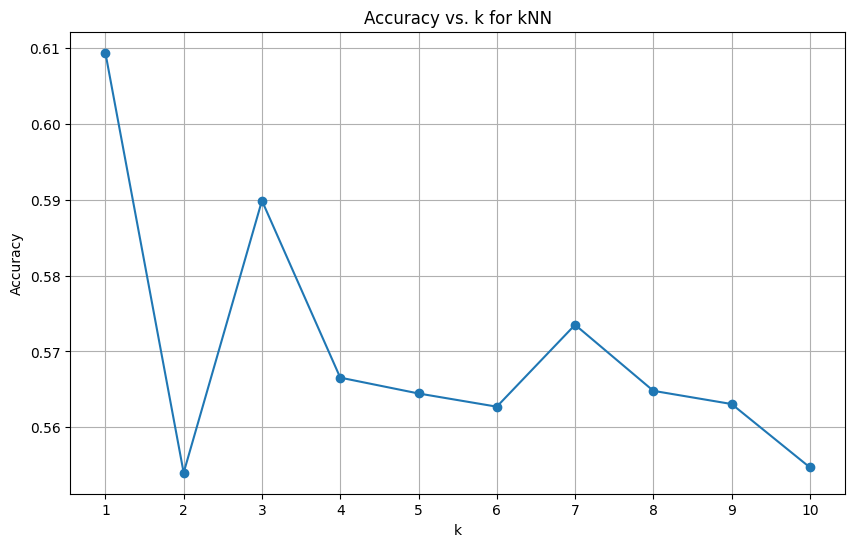

In [56]:

#  k values
k_values = list(range(1, 11))  

# list to store accuracy scores
accuracy_scores = []

# Iterate over each value of k
for k in k_values:
    # Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. k for kNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [57]:
y_train_pred = knn_classifier.predict(X_train) # predictions on the training data

y_test_pred = knn_classifier.predict(X_test) # Predictions on test data

# confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# precision, recall, and F1-score for training data
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
f1_score_train = f1_score(y_train, y_train_pred, average='macro')

# precision, recall, and F1-score for test data
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_score_test = f1_score(y_test, y_test_pred, average='macro')

# Printing
print("Confusion Matrix (Training Data):\n", conf_matrix_train)
print("Confusion Matrix (Test Data):\n", conf_matrix_test)

print("\nPerformance Metrics (Training Data):")
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-Score:", f1_score_train)

print("\nPerformance Metrics (Test Data):")
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-Score:", f1_score_test)

Confusion Matrix (Training Data):
 [[ 945  174  243]
 [ 246 1565  103]
 [ 450  238 2730]]
Confusion Matrix (Test Data):
 [[238 166 218]
 [173 539 115]
 [318 187 916]]

Performance Metrics (Training Data):
Precision: 0.7516626891248904
Recall: 0.7700682162483208
F1-Score: 0.758189062617633

Performance Metrics (Test Data):
Precision: 0.5547071406081706
Recall: 0.5596688161657289
F1-Score: 0.5551942374972807
